Title - Heart Disease 
Introduction:
 
Preliminary exploratory data analysis:
 
Methods:
1) Split data into Training Set and Testing Set. 
2) Split Training Set into a validation set and try to find a value of K using the Cross Validation Method. 
3) Then we use our K value to test against the Test Set 
4) We then find a conclusion based of the results 
Expected outcomes and significance:


In [31]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [32]:
columns = c("age", "sex", "cp", "trestbps", "chol", "fbs",
            "restecg", "maxheartrate", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data1 <- read_delim("data/processed.hungarian.data", delim = ",", col_names = columns)
heart_data2 <- read_delim("data/processed.cleveland.data", delim = ",", col_names = columns)
heart_data3 <- read_delim("data/processed.switzerland.data", delim = ",", col_names = columns)
heart_data1
heart_data2
heart_data3

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_character(),
  fbs = col_character(),
  restecg = col_character(),
  maxheartrate = col_character(),
  exang = col_character(),
  oldpeak = col_double(),
  slope = col_character(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  maxheartrate = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_character(),
  chol = col_double(),
  fbs = col_character(),
  restecg = col_character(),
  m

age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,1,1,95,0,?,0,127,0,.7,1,?,?,1
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


In [33]:
heart_disease_train <- rbind(heart_data1, heart_data2, heart_data3) %>%
select(-slope, -ca, -thal) %>%
filter(trestbps != "?", chol != "?", num != "?", num %in% c(0,1))%>%
mutate(sex = as_factor(sex), cp = as_factor(cp), fbs = as_factor(fbs),
      restecg = as_factor(restecg), exang = as_factor(exang), num = as_factor(num),
      trestbps = as.numeric(trestbps), chol = as.numeric(chol))
heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,maxheartrate,exang,oldpeak,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,0
29,1,2,120,243,0,0,160,0,0,0
30,0,1,170,237,0,1,170,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,0
73,0,3,160,0,0,1,121,0,0,1
74,1,2,145,0,?,1,123,0,1.3,1


In [34]:
observation_per_class <- heart_disease_train %>%
                            group_by(num) %>%
                            summarize(n = n())
observation_per_class

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,341
1,204


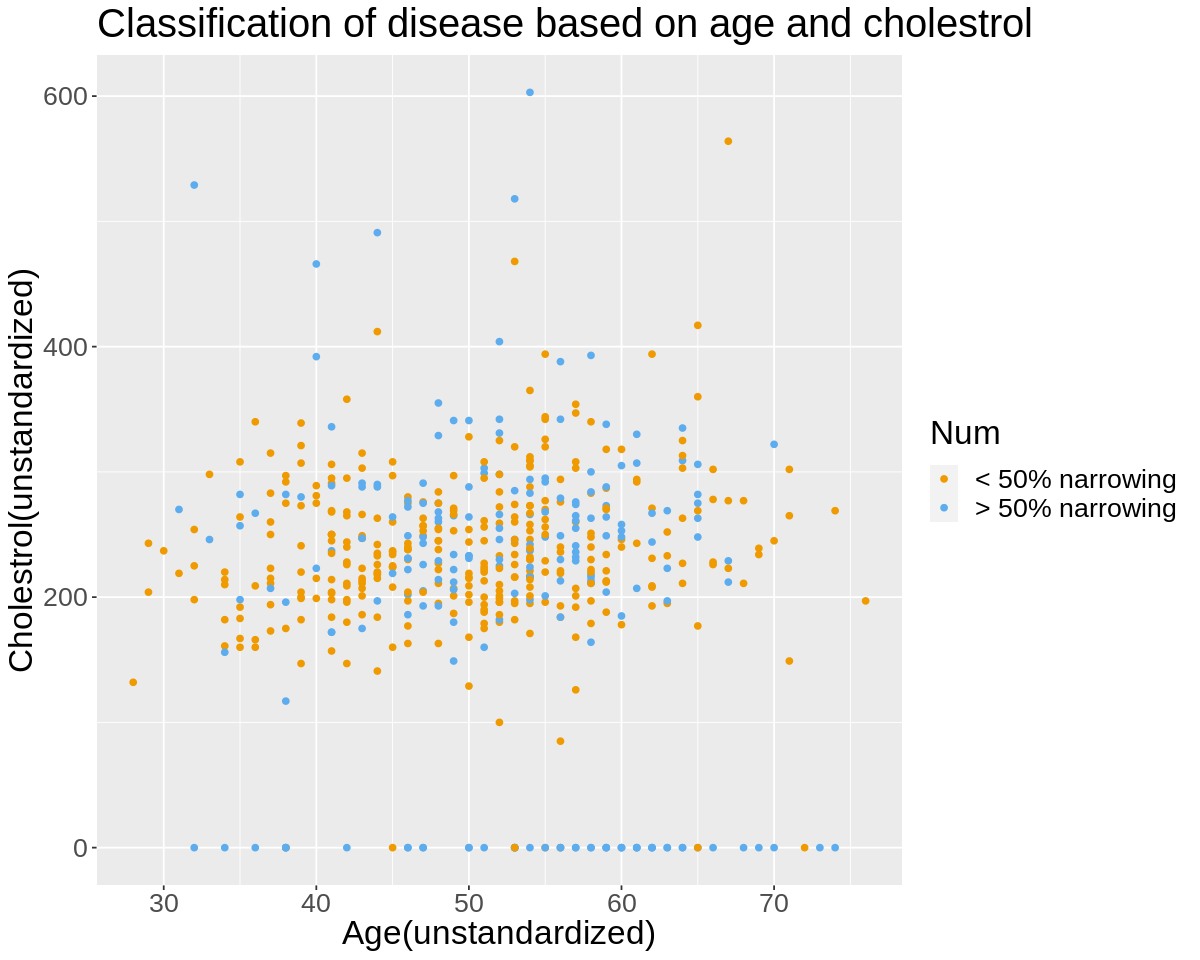

In [35]:
options (repr.plot.width = 10, repr.plot.height = 8)

disease_plot <- ggplot(heart_disease_train, aes(x = age, y = chol))+
                geom_point(aes(colour = num)) +
                labs(x = "Age(unstandardized)", y = "Cholestrol(unstandardized)",
                    colour = "Num")+
                scale_color_manual(labels = c("< 50% narrowing ", "> 50% narrowing"), 
                     values = c("orange2", "steelblue2")) +
                theme(text = element_text(size = 20))+
                ggtitle("Classification of disease based on age and cholestrol")
disease_plot